# Instagram Reach: EDA 

### Data Collection
-Dataset Source - 
https://www.kaggle.com/datasets/rxsraghavagrawal/instagram-reach

### Import Data and Required Packages


In [62]:
#### Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud


#### Import the Excel Data as Panda DataFrame

In [63]:
df =pd.read_csv("data/instagram_reach.csv",index_col=0)

In [64]:
#### Show Top 5 Records
df.head()

,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [65]:
#Shape of DataFrame
df.shape

(100, 7)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 12
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   S.No               100 non-null    int64 
 1   USERNAME           100 non-null    object
 2   Caption            94 non-null     object
 3   Followers          100 non-null    int64 
 4   Hashtags           100 non-null    object
 5   Time since posted  100 non-null    object
 6   Likes              100 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 6.2+ KB


In [67]:
df.isna().sum()

S.No                 0
USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [68]:
#Imputing null
df["Caption"] = df["Caption"].fillna(df["Caption"].mode()[0])

In [69]:
#Function to convert str to float
def onlydigits(x_str):
    number = ""
    for i in x_str:
        if i.isdigit() or i==".":
            number+=i 
    return int(number)

In [70]:
df["Time since posted"]=df["Time since posted"].apply(onlydigits)

In [71]:
def WCplot(cl):
    colData = df[cl]
    singletxt = ''
    for mem in colData:
        singletxt += str(mem)
    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(singletxt)
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


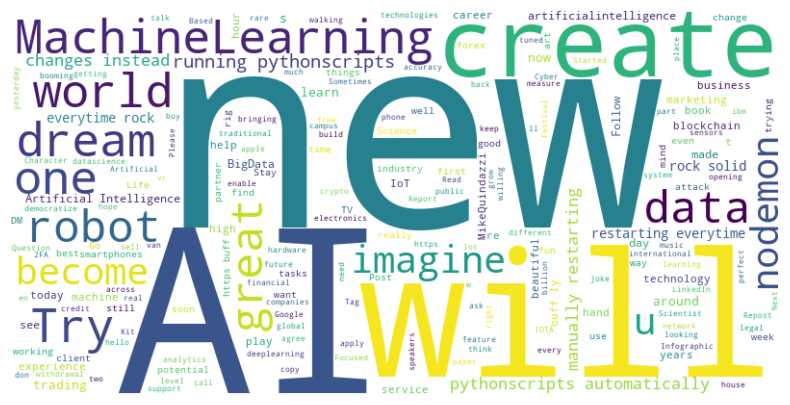

In [72]:
WCplot("Caption")

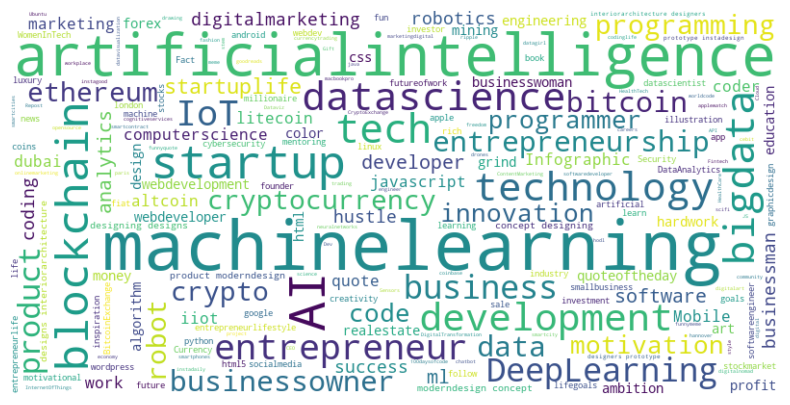

In [73]:
WCplot("Hashtags")

In [74]:
def distploter(col):
    colz=df[col]    
    sns.distplot(colz)
    plt.title(f"Distplot of {str(col).capitalize()}")
    plt.style.use('seaborn-v0_8-pastel')
    plt.show()

#### Distribution Checks

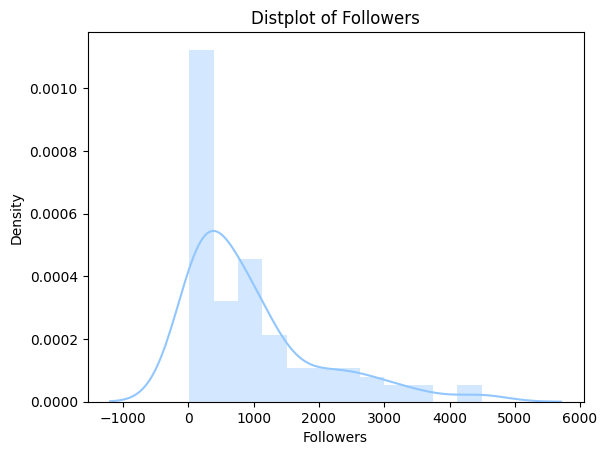

In [75]:
distploter("Followers")

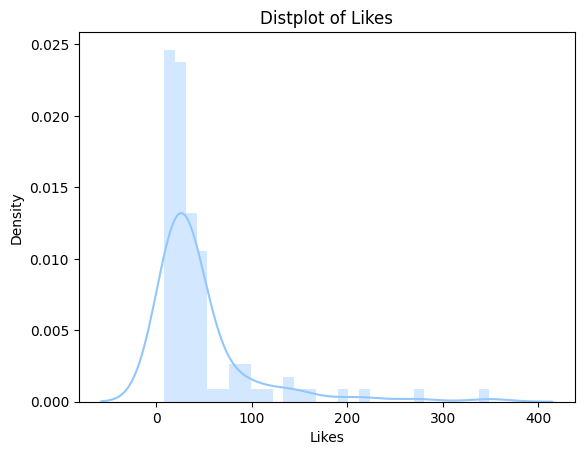

In [76]:
distploter("Likes")

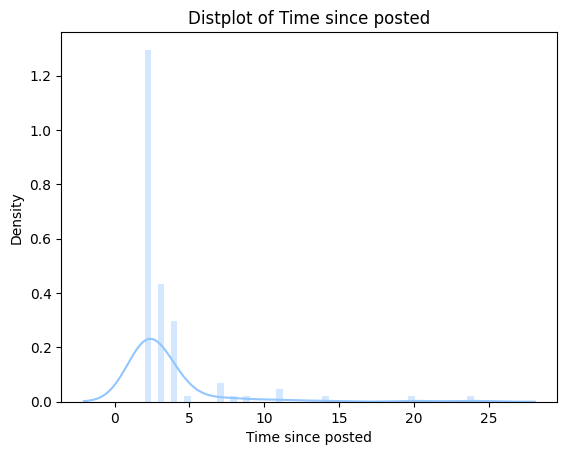

In [82]:
distploter("Time since posted")

#### Relation between Followers & Likes

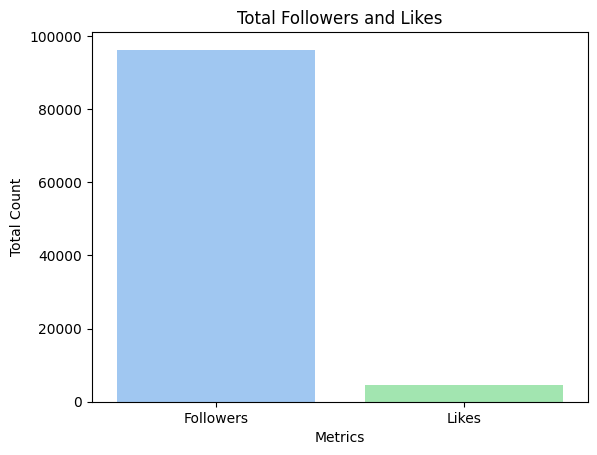

In [77]:
#Calculate the total
followers = df["Followers"].sum()
likes = df["Likes"].sum()
labels = ['Followers', 'Likes']
values = [followers, likes]

#Create a bar chart
sns.barplot(x=labels, y=values)
plt.xlabel('Metrics')
plt.ylabel('Total Count')
plt.title('Total Followers and Likes')
plt.show()


In [78]:
corx = df.corr()

<AxesSubplot: >

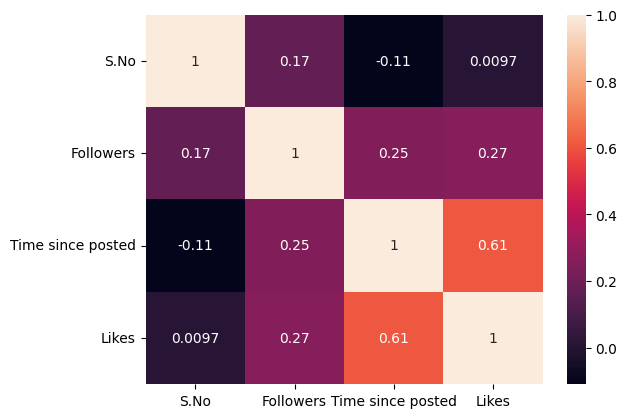

In [79]:
sns.heatmap(corx,annot=True)

In [83]:
#Final CSV file
df.to_csv("data/instagram_reach_fin.csv")